<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></span></li><li><span><a href="#Theory" data-toc-modified-id="Theory-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Theory</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#if-4-countries...." data-toc-modified-id="if-4-countries....-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>if 4 countries....</a></span></li></ul></li></ul></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span></li></ul></div>

# Initialization

In [2]:
from sympy.interactive.printing import init_printing
init_printing(use_unicode=False, wrap_line=True, no_global=True)
from sympy import *
import numpy as np, pandas as pd
import sys, os, string
import xlrd
from itertools import permutations, product
from functools import reduce
%load_ext rpy2.ipython

In [2]:
scriptDir = os.path.dirname(os.path.realpath(sys.argv[0]))   # get script directory
try: 
    genDir = "C:/Users/benmo/OneDrive/GitHub/DataPlayground" #get general functions path
    os.chdir(genDir)
except: 
    genDir = "D:/benmo/OneDrive/GitHub/DataPlayground"
    os.chdir(genDir)

os.chdir(genDir)

from General import * # import custom 'general' functions

os.chdir(scriptDir)

fpath = MyComp.financePath  #path to financial econ folder


cntryBook = xlrd.open_workbook(fpath + "/data/gvar/Country Data (1979Q1-2011Q2).xlsx")
sheets = cntryBook.sheet_names()

# Theory

In [3]:
lagsD = 1
lagsInt = 1

n = 6
c = 4


cntryList = ['USA', 'Canada', 'Japan', 'Germany']


varIndex = [[0,1,2,3,4], [0,1,2,3,4,5], [0,1,2,3,4,5], [0,1,2,3,4,5]]
varIndex_s = [[0,1,2,3,4,5], [0,1,2,3,4,5], [0,1,2,3,4,5], [0,1,2,3,4,5]]
    
k = [len(varIndex[0]), len(varIndex[1]), len(varIndex[2]), len(varIndex[3])]
ks = [len(varIndex_s[0]), len(varIndex_s[0]), len(varIndex_s[0]), len(varIndex_s[0])]



y, p, q, e, rho, m = [[None]*c for i in range(n)]
ys, ps, qs, es, rhos, ms = [[None]*c for i in range(n)]

for cntry in range(c):
    y[cntry], ys[cntry] = [[None]*(lagsD + 1) for i in range(lagsInt + 1)]
    p[cntry], ps[cntry] = [[None]*(lagsD + 1) for i in range(lagsInt + 1)]
    q[cntry], qs[cntry] = [[None]*(lagsD + 1) for i in range(lagsInt + 1)] 
    e[cntry], es[cntry] = [[None]*(lagsD + 1) for i in range(lagsInt + 1)]
    rho[cntry], rhos[cntry] = [[None]*(lagsD + 1) for i in range(lagsInt + 1)]
    m[cntry], ms[cntry] = [[None]*(lagsD + 1) for i in range(lagsInt + 1)]
    
    
x = [[None]*(lagsD + 1)]*c
xs = [[None]*(lagsInt + 1)]*c

for cntry in range(c):
    for lag in range(lagsD+1):
        y[cntry][lag], p[cntry][lag], q[cntry][lag], e[cntry][lag], rho[cntry][lag], m[cntry][lag] = symbols(
            'y_{i}t{l} p_{i}t{l} q_{i}t{l} e_{i}t{l} rho_{i}t{l} m_{i}t{l}'.format(
                i=cntry, l='-{lag}'.format(lag=lag) if lag > 0 else ''))

for cntry in range(c):
    x[cntry] = [MatrixSymbol(s, k[cntry], 1) for s in ["x_{i}t{l}".format(
        i=cntry, l='-{lag}'.format(lag=lag) if lag > 0 else '') for lag in range(lagsD+1)]]

for cntry in range(c):
    for lag in range(lagsInt+1):
        ys[cntry][lag], ps[cntry][lag], qs[cntry][lag], es[cntry][lag], rhos[cntry][lag], ms[cntry][lag] = symbols(
            'y_{i}t{l}^* p_{i}t{l}^* q_{i}t{l}^* e_{i}t{l}^* rho_{i}t{l}^* m_{i}t{l}^*'.format(
                i=cntry, l='-{lag}'.format(lag=lag) if lag > 0 else ''))

for cntry in range(c):
    xs[cntry] = [MatrixSymbol(s, ks[cntry], 1) for s in ["x_{i}t{l}^*".format(
        i=cntry, l='-{lag}'.format(lag=lag) if lag > 0 else '') for lag in range(lagsInt+1)]]
    

a0, a1, phi, lambda0, lambda1, err = [[None]*c for i in range(6)]      


for cntry in range(c):    
    a0[cntry] = MatrixSymbol("a_{i}0".format(i=cntry), k[cntry], 1)
    a1[cntry] = MatrixSymbol("a_{i}1".format(i=cntry), k[cntry], 1)

    phi[cntry] = MatrixSymbol("Phi_{i}".format(i=cntry), k[cntry], k[cntry])
    lambda0[cntry] = MatrixSymbol("Lambda_{i}0".format(i=cntry), k[cntry],ks[cntry])
    lambda1[cntry] = MatrixSymbol("Lambda_{i}1".format(i=cntry), k[cntry],ks[cntry])
    err[cntry] = MatrixSymbol("epsilon_{i}".format(i=cntry), k[cntry], 1)

t = Symbol('t')


I = [None]*n
for i in range(1,n+1):
    I[i-1] = MatrixSymbol('I_{n}'.format(n=i),i,i)

A = [Matrix([I[4], -lambda0[i]]).T for i in range(c)]
B = [Matrix([phi[i], lambda1[i]]).T for i in range(c)]

x = Matrix(x)
xs = Matrix(xs)

z = [[Matrix([x[cntry,0],xs[cntry,0]]), Matrix([x[cntry,1],xs[cntry,1]])] for cntry in range(c)]


z[0]
A[0]*z[0][0]
(B[0]*z[0][1])[0]



In [4]:

for cntry in range(c):
    for lag in range(lagsD + 1):
        x[cntry,lag].values = Matrix([[y[cntry][lag], p[cntry][lag],
                                   q[cntry][lag], e[cntry][lag],
                                   rho[cntry][lag], m[cntry][lag]][i] for i in varIndex[cntry]])

for cntry in range(c):
    for lag in range(lagsInt + 1):    
        xs[cntry,lag].values = Matrix([[ys[cntry][lag], ps[cntry][lag],
                                    qs[cntry][lag], es[cntry][lag],
                                    rhos[cntry][lag], ms[cntry][lag]][i] for i in varIndex_s[cntry]])


relational.Eq(x[0,0], a0[0] + a1[0]*t + phi[0]*x[0,1] + lambda0[0]*xs[0,0] + lambda1[0]*xs[0,1])


In [5]:
relational.Eq((A[0]*z[0][0])[0], a0[0] + a1[0]*t  + (B[0]*z[0][1])[0])

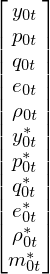

In [6]:

vecVal = lambda zin: Matrix(list(map(lambda x: x.values, zin)))


vecVal(z[0][0])

In [7]:

tradeWeights = MatrixSymbol('w^(t)', c, c)
tradeWeights.values = Matrix([[Symbol('w_{i},{j}'.format(i=i,j=j)) for i in range(c)] for j in range(c)])


singleEl = lambda x, y: Matrix([[1 if xi == yi else 0 for xi in x] for yi in y])
multiElW = lambda x, y, z, w: [w[i] if (x[i] in y) & (x[i] != z) else 0 for i in range(len(x))]





In [8]:
weightsAndVars = [[[x[i,0].values,Matrix([tradeWeights.values[i,k]]*len(x[i,0].values))] for i in range(len(x[:,0]))] for k in range(c)]
fvars = lambda x: [x[i][0] for i in range(len(x))]
fweights = lambda x: [x[i][1] for i in range(len(x))]

xvars = Matrix(fvars(weightsAndVars[0]))
wvars = [Matrix(fweights(weightsAndVars[i])) for i in range(c)]

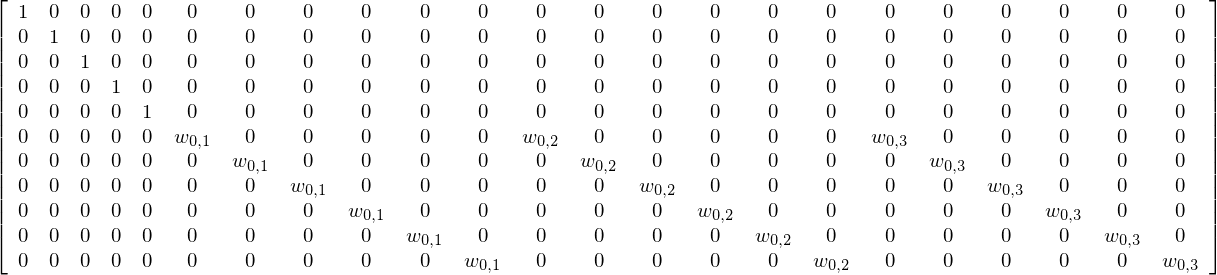

In [9]:
varsList = [y, p, q, e, rho, m]
vecVal(x[:,0])
Matrix(y)[:,0][0] in vecVal(x[:,0])



Matrix.vstack(singleEl(xvars,fvars(weightsAndVars[0])[0]),
    Matrix([multiElW(xvars, Matrix(var)[:,0], Matrix(var)[:,0][0], wvars[0]) for var in varsList]))

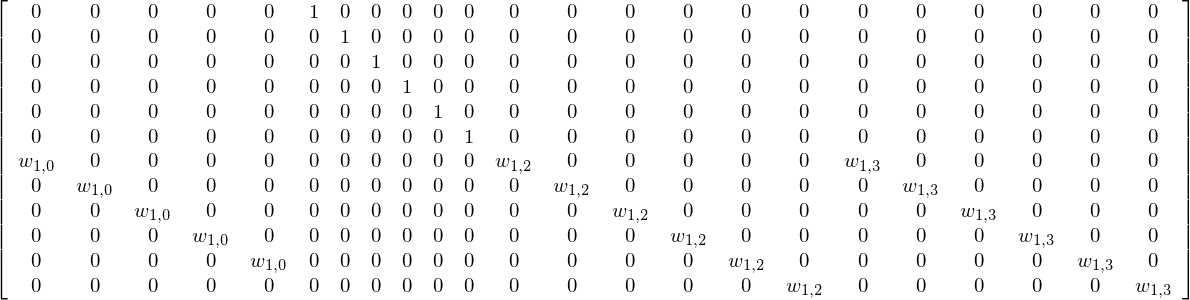

In [820]:
Matrix.vstack(singleEl(xvars,fvars(weightsAndVars[1])[1]),
    Matrix([multiElW(xvars, Matrix(var)[:,0], Matrix(var)[:,0][1], wvars[1]) for var in varsList]))

In [528]:
W = [None]*4
W = [MatrixSymbol(s, k, k) for s in ['W_{x}'.format(x=x) for x in range(4)]]

### if 4 countries.... 

In [668]:


W = []*4
W = [MatrixSymbol(s, 4, 4) for s in ['W_{x}'.format(x=x) for x in range(4)]]



G = BlockMatrix([[W0], [W1],[W2], [W3]])

bob = tradeWeights**2

bob.as_explicit()[0,0].subs(tradeWeights[0,0], Symbol('w_0'))


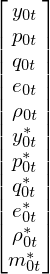

In [276]:
z[0][0].values = Matrix.vstack(x[0,0].values, xs[0,0].values)
z[0][0].values

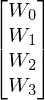

In [30]:

G.blocks[0]

G

# Data

In [217]:

for bob in range(c):
    print(bob)

0
1
2
3


In [225]:
for cntry in range(c):
    x[cntry] = [MatrixSymbol(s, k[cntry], 1) for s in ["x_{i}t{l}".format(
        i=cntry, l='-{lag}'.format(lag=lag) if lag > 0 else '') for lag in range(lagsD+1)]]
x

In [56]:
i = 0
for _ in range(c):
    print(i)
    i+=2

0
2
4
6


In [244]:
bob = [1,2,3,4,5]


In [759]:
varsList = [y, p, q, e, rho, m]
vecVal(x[:,0])
Matrix(y)[:,0][0] in vecVal(x[:,0])
[multiElW(xvars, Matrix(var)[:,0], Matrix(var)[:,0][0], wvars) for var in varsList]

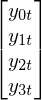

In [559]:
Matrix(y)[:,0]

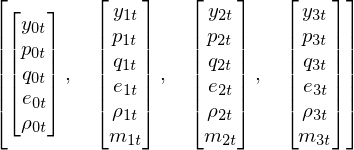

In [662]:
bob = list(map(lambda x: x.values, x[:,0]))
bob

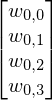

In [687]:
tradeWeights.values = Matrix([[Symbol('w_{i},{j}'.format(i=i,j=j)) for i in range(c)] for j in range(c)])
tradeWeights.values[:,0]

In [628]:
y[0][0]

In [647]:
blah = lambda x, y: list(map(lambda x, y=y: y in x, x)).index(True)

In [650]:
blah(bob,y[1][0])

In [661]:
bill = multiEl(vecVal(x[:,0]), Matrix(y)[:,0], Matrix(y)[:,0][0])
list(filter(lambda x: x != 0, bill))

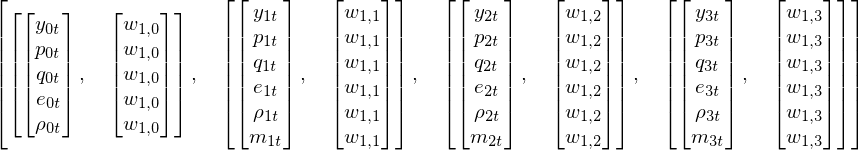

In [789]:

weightsAndVars[1]

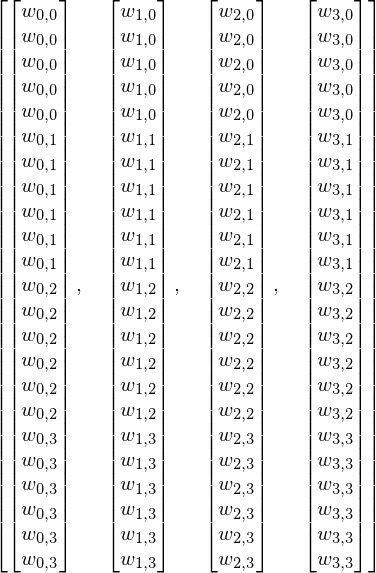

In [819]:
wvars

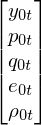

In [764]:

fvars(weightsAndVars[0])[0]

In [806]:
xvars = Matrix(fvars(weightsAndVars[0]))
xvars
xvars, wvars = [[None]*c]*2
wvars

[None, None, None, None]

In [4]:
%R install.packages("dyn")